# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [57]:
#Your code here
lower_columns = []
for column in df.columns:
    lower_columns.append(column.lower())
#lower_columns = [column.lower() for column in df.columns]
df.columns = lower_columns
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

# Change the Index to be the Line Names

In [58]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [59]:
# Your code here
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [60]:
# Your code here
Num_Lines = [len(linename) for linename in df.linename]
df['Num_Lines'] = Num_Lines
df.sort_values('Num_Lines', ascending=False)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name.

In [61]:
def clean(col_name):
    cleaned = col_name.capitalize() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [62]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [63]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/a', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [64]:
#Your code here
df.Date = pd.to_datetime(df.Date)
df['Day_of_week']= df.Date.dt.day_name()
df.Day_of_week

0          Saturday
1          Saturday
2          Saturday
3          Saturday
4          Saturday
5          Saturday
6            Sunday
7            Sunday
8            Sunday
9            Sunday
10           Sunday
11           Sunday
12           Monday
13           Monday
14           Monday
15           Monday
16           Monday
17           Monday
18          Tuesday
19          Tuesday
20          Tuesday
21          Tuesday
22          Tuesday
23          Tuesday
24        Wednesday
25        Wednesday
26        Wednesday
27        Wednesday
28        Wednesday
29        Wednesday
            ...    
197595       Monday
197596       Monday
197597       Monday
197598       Monday
197599       Monday
197600       Monday
197601      Tuesday
197602      Tuesday
197603      Tuesday
197604      Tuesday
197605      Tuesday
197606      Tuesday
197607    Wednesday
197608    Wednesday
197609    Wednesday
197610    Wednesday
197611    Wednesday
197612    Wednesday
197613     Thursday


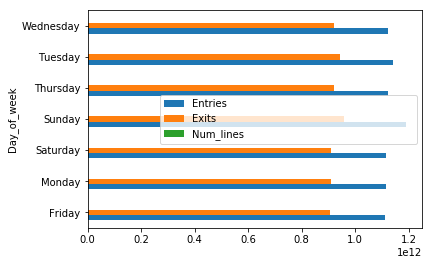

In [65]:
days = df.groupby('Day_of_week').sum()
days.plot(kind = 'barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [66]:
days

,Entries,Exits,Num_lines
Day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713


In [67]:
#Your code here
days = days.reset_index()
days["is_weekend"] = days.Day_of_week.map({'Saturday':True, 'Sunday': True, 'Monday': False, 'Tuesday': False, 'Wednesday': False, 'Thursday': False, 'Friday': False
                                          })
weekend = days.groupby('is_weekend').mean()

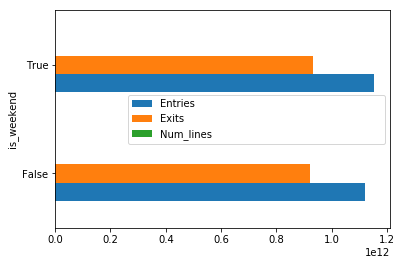

In [74]:
weekend.plot(kind = 'barh')
#weekend[['Entries', 'Exits']].plot(kind='barh')

The weekends are a little busier, but it is mostly even.

# Drop a couple of columns

In [75]:
# Your code here
df = df.drop(['Division', 'C/a'], axis =1)
df.head()

,Linename,Unit,Scp,Station,Date,Time,Desc,Entries,Exits,Num_lines,Day_of_week
0,NQR456W,R051,02-00-00,59 ST,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,R051,02-00-00,59 ST,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,R051,02-00-00,59 ST,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,R051,02-00-00,59 ST,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,R051,02-00-00,59 ST,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday
